# Gradient Descent Introduction

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###### In iterative algorithms such as gradient descent we are concerned with convergence. Here is a summary of the convergence concept:
* Compute an error term, call it $e_k = ||\hat{r}_k - r||$ where $\hat{r}_k$ is the estimate at each iteration and $r$ is the true value
* The goal is for $\displaystyle\lim_{k\to\infty}e_k = 0$
* Comparing $e_k$ to 0 directly, as in, is $e_k=0$? is a bad idea due to floating point representation of numbers
* Instead we will compare $e_k$ to some tolerance $\epsilon$ (recall $\epsilon-\delta$ proofs!) and terminate the algorithm when $e_k = ||\hat{r}_k - r||<\epsilon$
* What if, as is often the case, $r$ is unknown? This question will be considered later.

###### The problem with $==$ and floating-point considerations.

In [6]:
xhat = 1/10+1/10+1/10
xtrue = 3/10
print(xhat)
print(xtrue)

0.30000000000000004
0.3


### Newton's Method Example

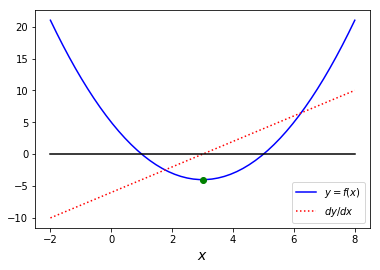

In [10]:
f = lambda x: x**2-6*x+5
df = lambda x: 2*x-6
df2 = lambda x: 2

x = np.linspace(-2,8)
plt.plot(x,f(x),'b',label='$y=f(x)$')
plt.plot(x,df(x),'r:', label='$dy/dx$')
plt.plot(3,f(3),'go',x,x*0,'k')
plt.xlabel('$x$', size=14)
plt.legend(['$y=f(x)$', '$dy/dx$']);

In [14]:
def newton(r,func,dfunc,tol,maxiter=10):
    k, err =0,1+tol
    evec = []
    while np.fabs(err) > tol and k < maxiter:
        err = func(r)/dfunc(r)
        evec.append(np.fabs(err))
        r -= err
        k += 1
    return evec+np.finfo(float).eps, k-1, r

The root is 0.9999999999999999 after 5 iterations with error = 2.2204e-15.


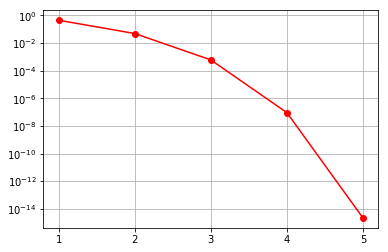

In [15]:
evec, its, root = newton(2,f,df,1e-8)
print('The root is {} after {} iterations with error = {:2.4e}.'.format(root,its,evec[-1]))
plt.semilogy(np.arange(1,len(evec)),evec[1:],'ro-')
plt.xticks(np.arange(1,len(evec)))
plt.grid(True);

In [16]:
evec, its, root = newton(4,df,df2,1e-8)
print('The root is {} after {} iterations with error = {:2.4e}.'.format(root,its,evec[-1]))

The root is 3.0 after 1 iterations with error = 2.2204e-16.


### Gradient Descent in 1D

In [17]:
def gradient_descent1D(x, eta, tol = 1e-8, nmax = 100):
    # *************************************************************
    # gradient_descent1D (GD)
    #
    # Internal parameters:
    #      iterror := abs(x_current - x_previous)
    #      k := number of iterations
    #      errvec := array of iterrors (history)
    #
    # Arguments:
    #      x := initial guess
    #      eta := step-size (learning rate)
    #      tol := tolerance for iteration error
    #      nmax := max number of iterations allowed by while loop
    #
    # Output:
    #      x, k, errvec (as defined above)
    # *************************************************************
    
    # Initialize the internal parameters
    iterror = tol+1
    k = 0
    errvec = []
    # Implement the GD algorithm
    while (iterror > tol) and (k < nmax):
        x0=x
        grad = df(x)
        x -= eta*grad
        iterror = np.fabs(x-x0)
        errvec.append(iterror)
        k+=1
    # Return output
    return x, k, errvec

In [18]:
# Initial Guess
np.random.seed(0)
x0 = 10*np.random.rand(1)[0]
print("x0 = {:2.2f}".format(x0))
# Set the simulation parameters
eta, nmax, tol = 0.25, 100, 1e-4
# Run GD and print output
xmin, n, errvec = gradient_descent1D(x0,eta,tol)
print("Step-size: {:}, tolerance: {:}".format(eta,tol))
print("After {:d} iterations the min is {:2.4f}".format(n,xmin))

x0 = 5.49
Step-size: 0.25, tolerance: 0.0001
After 15 iterations the min is 3.0001


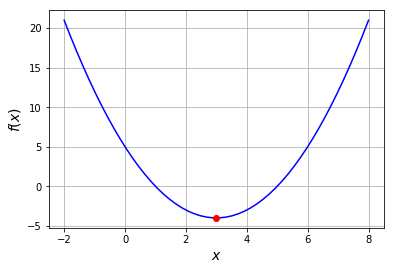

In [19]:
plt.plot(x,f(x),'b',xmin,f(xmin),'ro')
plt.xlabel('$x$',size=14)
plt.ylabel('$f(x)$',size=14)
plt.grid(True);

/home/heavyside/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


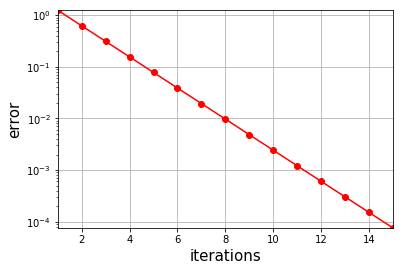

In [20]:
plt.semilogy(np.arange(len(errvec))+1,errvec,'ro-')
plt.xlabel('iterations',size=15)
plt.ylabel('error',size=15)
plt.axis([1,len(errvec),0,max(errvec)])
plt.grid(True);

In [21]:
def gradient_descentLR(x, y, eta, tol=1e-4, itmax = 100):
    # *************************************************************
    # gradient_descentLR
    #
    # Internal parameters:
    #      iterror := abs(x_current - x_previous)
    #      epochs := number of iterations
    #      errvec := array of iterrors (history)
    #      w := weight vector corresponding to each feature
    #
    # Arguments:
    #      x := feature set
    #      y := data
    #      eta := step-size
    #      tol := convergence tolerance
    #      itmax := max number of iterations allowed by while loop
    #
    # Output:
    #      W := weight vector corresponding to each feature
    #      epochs := number of iterations to reach convergence
    #      errvec
    # *************************************************************
    
    # Initialize the internal parameters
    iterror, epochs = tol+1, 1
    errvec = []
    # Initialize the weights with some random vector
    W = np.random.rand(2)
    X = np.c_[np.ones(len(x)),x]
    # Implement the GD algorithm
    while (iterror > tol) and (epochs < itmax):       
        W0 = W.copy()
        pred = X.dot(W)
        error = pred - y
        grad = X.T.dot(error)
        W -= eta*grad
        
        iterror = np.sqrt((W-W0).dot(W-W0))
        errvec.append(iterror)
        epochs += 1
    # Return output
    return W, epochs-1, errvec

###### Toy Data

In [22]:
x = np.random.rand(50)
y = 1.5*x + 1.1 + np.random.randn(len(x))*0.1

###### Display Data

Step-size: 0.03, tolerance: 0.0001
After 250 iterations the min is [1.09859044 1.49764601]


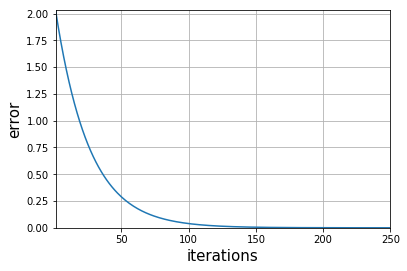

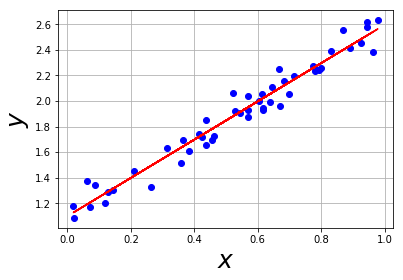

In [23]:
# Set the simulation parameters
eta = 3e-2
itmax = 5000
tol = 1e-4
# Run GD
w, epochs, errvec = gradient_descentLR(x,y,eta,tol,itmax)
# ******************************************************************
# Display the results
# ******************************************************************
print("Step-size: {:}, tolerance: {:}".format(eta,tol))
print("After {:d} iterations the min is {:}".format(len(errvec),w))
plt.plot(np.arange(len(errvec))+1,errvec)
plt.xlabel('iterations',size=15)
plt.ylabel('error',size=15)
plt.axis([1,len(errvec),0,max(errvec)])
plt.grid(True);
plt.figure()
plt.plot(x,y,'bo',x,w[0] + w[1]*x,'r')
plt.xlabel('$x$',size=25)
plt.ylabel('$y$',size=25)
plt.grid(True);